# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

X: 1041
Y: 6671


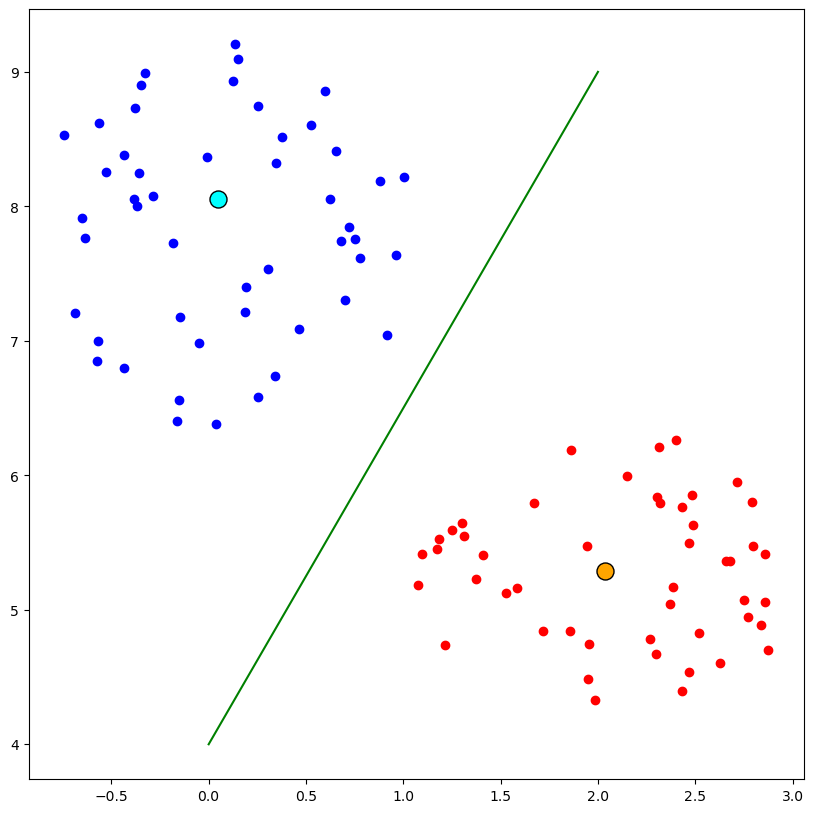

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# 111111

file_path = '0.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist()  

x1 = 0
x2 = 2
y1 = 4
y2 = 9

def classify_point_via_cross_product(px, py, x1, y1, x2, y2):
    px = px - x1
    py = py - y1
    cross_product = (x2 - x1) * py - (y2 - y1) * px
    if cross_product > 0:
        return 1  
    elif cross_product < 0:
        return 0 
    else:
        return -1  

cluster1, cluster2 = [], []

for px, py in zip(x, y):
    cluster = classify_point_via_cross_product(px, py, x1, y1, x2, y2)
    if cluster == 1:
        cluster1.append((px, py))
    elif cluster == 0:
        cluster2.append((px, py))
    

def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def find_central_point(cluster):
    min_distance = float('inf')
    central_point = None
    for p1 in cluster:
        total_distance = sum(euclidean_distance(p1, p2) for p2 in cluster)
        if total_distance < min_distance:
            min_distance = total_distance
            central_point = p1
            
    return central_point

central_point1 = find_central_point(cluster1)
central_point2 = find_central_point(cluster2)

avgx = (central_point1[0] + central_point2[0]) / 2
avgy = (central_point2[1] + central_point1[1]) / 2
avgx *= 1000
avgy *= 1000
if(avgx > int(avgx)):
    print("X:", int(avgx))
else:
    print("X:", int(avgx) - 1)
if(avgy > int(avgy)):
    print("Y:", int(avgy))
else:
    print("Y:", int(avgy) - 1)
plt.figure(figsize=(10, 10))

cluster1_x, cluster1_y = zip(*cluster1)
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Кластер 1')
plt.scatter(*central_point1, color='cyan', edgecolors='black', s=150, label='Центральная точка Кластера 1')

cluster2_x, cluster2_y = zip(*cluster2)
plt.scatter(cluster2_x, cluster2_y, color='red', label='Кластер 2')
plt.scatter(*central_point2, color='orange', edgecolors='black', s=150, label='Центральная точка Кластера 2')
plt.plot([x1, x2], [y1, y2], color='green', linestyle='-')

plt.show()

# 222222

X: 8177
Y: 738


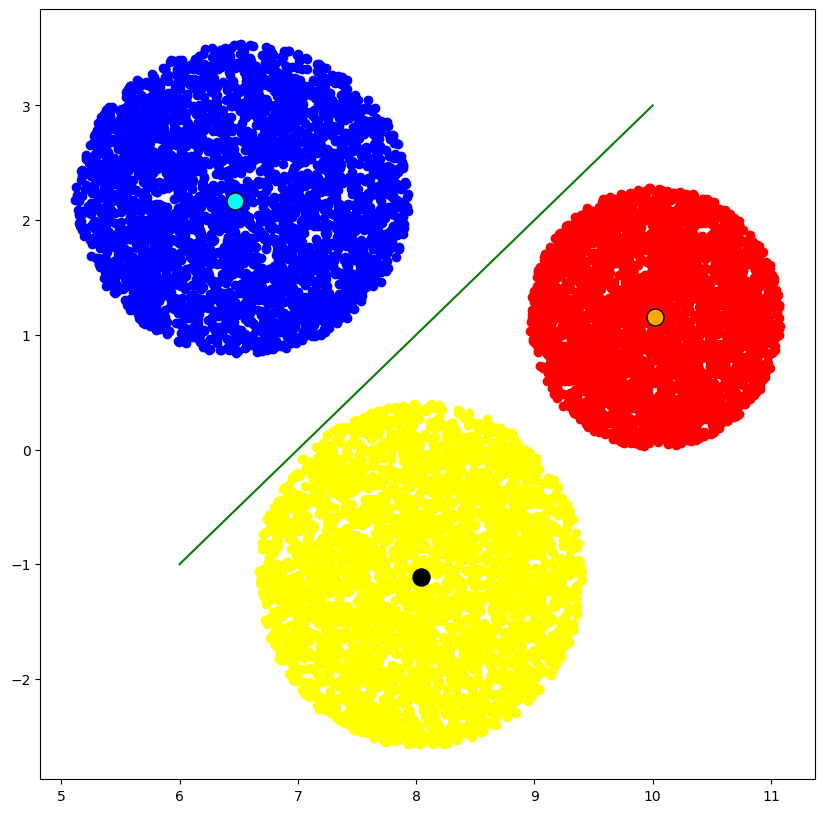

In [22]:
# 222222

file_path = '1.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist()  

yy = 0.7
x1 = 6
x2 = 10
y1 = -1
y2 = 3
x3 = 8
x4 = 10
y3 = 1
y4 = -0.5

def classify_point_via_cross_product(px, py, x1, y1, x2, y2):
    if(py > yy):
        px = px - x1
        py = py - y1
        cross_product = (x2 - x1) * py - (y2 - y1) * px
        if cross_product > 0:
            return 1  
        elif cross_product < 0:
            return 2 
    else:
        px = px - x3
        py = py - y3
        cross_product = (x4 - x3) * py - (y4 - y3) * px
        if cross_product > 0:
            return 2 
        elif cross_product < 0:
            return 3 

cluster1, cluster2, cluster3 = [], [], []

for px, py in zip(x, y):
    cluster = classify_point_via_cross_product(px, py, x1, y1, x2, y2)
    if cluster == 1:
        cluster1.append((px, py))
    elif cluster == 2:
        cluster2.append((px, py))
    elif cluster == 3:
        cluster3.append((px,py))
    

def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def man(p1,p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def find_central_point(cluster):
    min_distance = float('inf')
    central_point = None
    for p1 in cluster:
        total_distance = sum(euclidean_distance(p1, p2) for p2 in cluster)
        if total_distance < min_distance:
            min_distance = total_distance
            central_point = p1
            
    return central_point

central_point1 = find_central_point(cluster1)
central_point2 = find_central_point(cluster2)
central_point3 = find_central_point(cluster3)

avgx = (central_point1[0] + central_point2[0] + central_point3[0]) / 3
avgy = (central_point2[1] + central_point1[1] + central_point3[1]) / 3
avgx *= 1000
avgy *= 1000
if(avgx > int(avgx)):
    print("X:", int(avgx))
else:
    print("X:", int(avgx) - 1)
if(avgy > int(avgy)):
    print("Y:", int(avgy))
else:
    print("Y:", int(avgy) - 1)

plt.figure(figsize=(10, 10))

cluster1_x, cluster1_y = zip(*cluster1)
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Кластер 1')
plt.scatter(*central_point1, color='cyan', edgecolors='black', s=150, label='Центральная точка Кластера 1')

cluster2_x, cluster2_y = zip(*cluster2)
plt.scatter(cluster2_x, cluster2_y, color='red', label='Кластер 2')
plt.scatter(*central_point2, color='orange', edgecolors='black', s=150, label='Центральная точка Кластера 2')

cluster3_x, cluster3_y = zip(*cluster3)
plt.scatter(cluster3_x, cluster3_y, color='yellow', label='Кластер 3')
plt.scatter(*central_point3, color='black', edgecolors='black', s=150, label='Центральная точка Кластера 3')
plt.plot([x1, x2], [y1, y2], color='green', linestyle='-')

plt.show()

# 333333

X: 23509
Y: 554


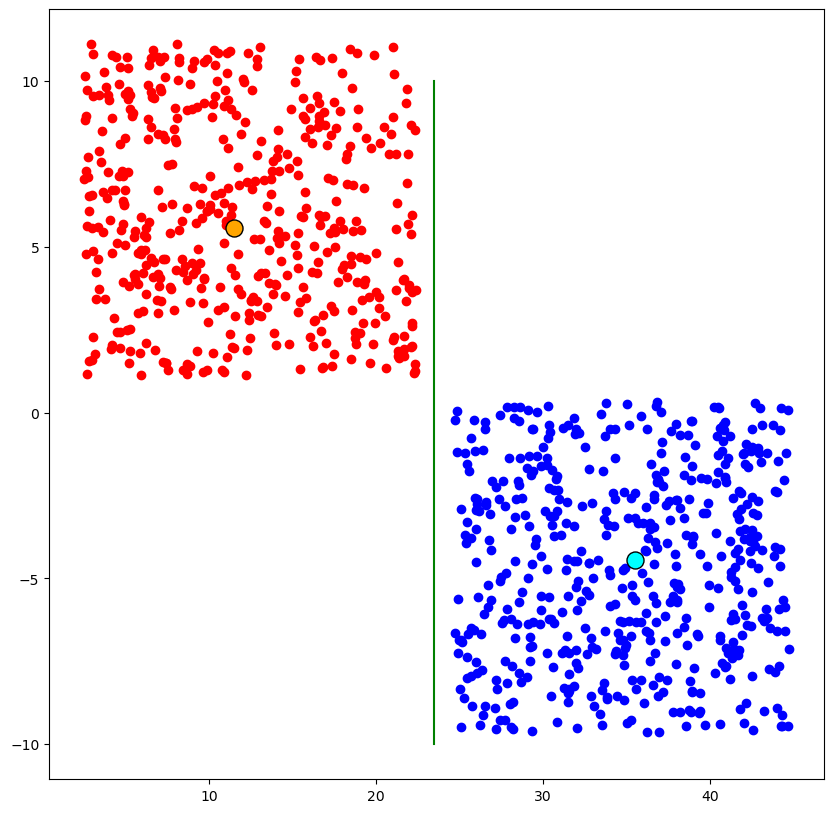

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# 33333333y

file_path = '2.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist()  

x1 = 23.5
x2 = 23.5
y1 = 10
y2 = -10

def classify_point_via_cross_product(px, py, x1, y1, x2, y2):
    px = px - x1
    py = py - y1
    cross_product = (x2 - x1) * py - (y2 - y1) * px
    if cross_product > 0:
        return 1  
    elif cross_product < 0:
        return 0 
    else:
        return -1  

cluster1, cluster2 = [], []

for px, py in zip(x, y):
    cluster = classify_point_via_cross_product(px, py, x1, y1, x2, y2)
    if cluster == 1:
        cluster1.append((px, py))
    elif cluster == 0:
        cluster2.append((px, py))
    

def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def find_central_point(cluster):
    min_distance = float('inf')
    central_point = None
    for p1 in cluster:
        total_distance = sum(man(p1, p2) for p2 in cluster)
        if total_distance < min_distance:
            min_distance = total_distance
            central_point = p1
            
    return central_point

central_point1 = find_central_point(cluster1)
central_point2 = find_central_point(cluster2)

avgx = (central_point1[0] + central_point2[0]) / 2
avgy = (central_point2[1] + central_point1[1]) / 2
avgx *= 1000
avgy *= 1000
if(avgx > int(avgx)):
    print("X:", int(avgx))
else:
    print("X:", int(avgx) - 1)
if(avgy > int(avgy)):
    print("Y:", int(avgy))
else:
    print("Y:", int(avgy) - 1)
plt.figure(figsize=(10, 10))

cluster1_x, cluster1_y = zip(*cluster1)
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Кластер 1')
plt.scatter(*central_point1, color='cyan', edgecolors='black', s=150, label='Центральная точка Кластера 1')

cluster2_x, cluster2_y = zip(*cluster2)
plt.scatter(cluster2_x, cluster2_y, color='red', label='Кластер 2')
plt.scatter(*central_point2, color='orange', edgecolors='black', s=150, label='Центральная точка Кластера 2')
plt.plot([x1, x2], [y1, y2], color='green', linestyle='-')

plt.show()

# 44444

X: 3078
Y: -4759


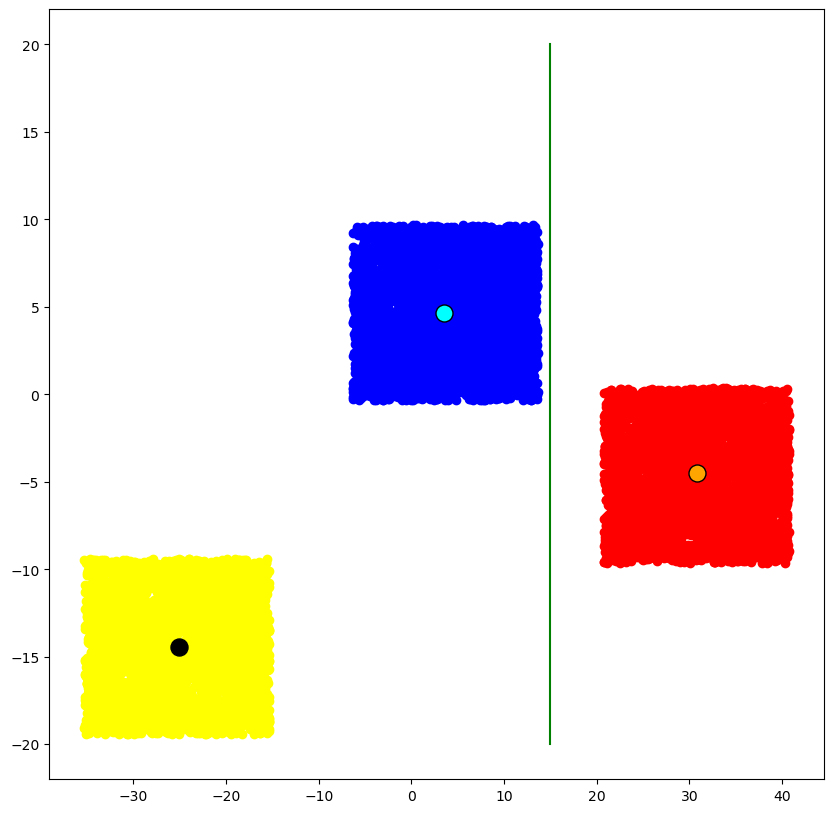

In [46]:
# 4444444

file_path = '3.csv'

data = pd.read_csv(file_path, skiprows=0, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist()  

yy = -5
x1 = 15
x2 = 15
y1 = 20
y2 = -20
x3 = 15
x4 = 15
y3 = 20
y4 = -20

def classify_point_via_cross_product(px, py, x1, y1, x2, y2):
    if(py > yy):
        px = px - x1
        py = py - y1
        cross_product = (x2 - x1) * py - (y2 - y1) * px
        if cross_product > 0:
            return 2 
        elif cross_product < 0:
            return 1 
    else:
        px = px - x3
        py = py - y3
        cross_product = (x4 - x3) * py - (y4 - y3) * px
        if cross_product > 0:
            return 2
        elif cross_product < 0:
            return 3 

cluster1, cluster2, cluster3 = [], [], []

for px, py in zip(x, y):
    cluster = classify_point_via_cross_product(px, py, x1, y1, x2, y2)
    if cluster == 1:
        cluster1.append((px, py))
    elif cluster == 2:
        cluster2.append((px, py))
    elif cluster == 3:
        cluster3.append((px,py))
    

def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def man(p1,p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def find_central_point(cluster):
    min_distance = float('inf')
    central_point = None
    for p1 in cluster:
        total_distance = sum(man(p1, p2) for p2 in cluster)
        if total_distance < min_distance:
            min_distance = total_distance
            central_point = p1
            
    return central_point

central_point1 = find_central_point(cluster1)
central_point2 = find_central_point(cluster2)
central_point3 = find_central_point(cluster3)

avgx = (central_point1[0] + central_point2[0] + central_point3[0]) / 3
avgy = (central_point2[1] + central_point1[1] + central_point3[1]) / 3
avgx *= 1000
avgy *= 1000
if(avgx > int(avgx)):
    print("X:", int(avgx))
else:
    print("X:", int(avgx) - 1)
if(avgy > int(avgy)):
    print("Y:", int(avgy))
else:
    print("Y:", int(avgy) - 1)

plt.figure(figsize=(10, 10))

cluster1_x, cluster1_y = zip(*cluster1)
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Кластер 1')
plt.scatter(*central_point1, color='cyan', edgecolors='black', s=150, label='Центральная точка Кластера 1')

cluster2_x, cluster2_y = zip(*cluster2)
plt.scatter(cluster2_x, cluster2_y, color='red', label='Кластер 2')
plt.scatter(*central_point2, color='orange', edgecolors='black', s=150, label='Центральная точка Кластера 2')

cluster3_x, cluster3_y = zip(*cluster3)
plt.scatter(cluster3_x, cluster3_y, color='yellow', label='Кластер 3')
plt.scatter(*central_point3, color='black', edgecolors='black', s=150, label='Центральная точка Кластера 3')
plt.plot([x1, x2], [y1, y2], color='green', linestyle='-')

plt.show()

# 44444

X: 2588
Y: 4996


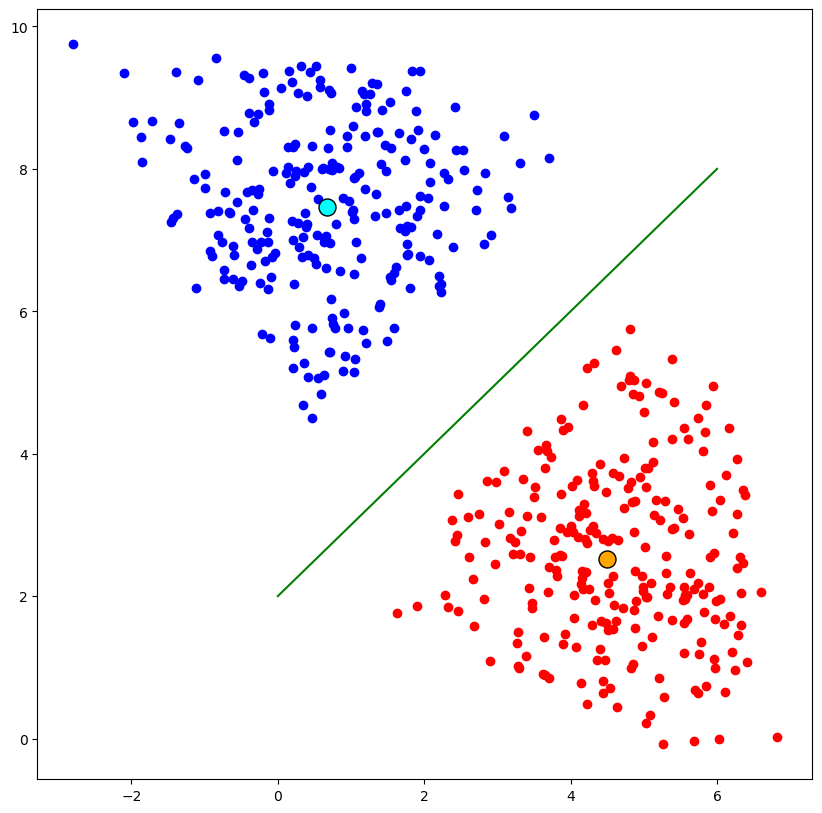

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# 555555

file_path = '4.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist()  

x1 = 0
x2 = 6
y1 = 2
y2 = 8

def classify_point_via_cross_product(px, py, x1, y1, x2, y2):
    px = px - x1
    py = py - y1
    cross_product = (x2 - x1) * py - (y2 - y1) * px
    if cross_product > 0:
        return 1  
    elif cross_product < 0:
        return 0 
    else:
        return -1  

cluster1, cluster2 = [], []

for px, py in zip(x, y):
    cluster = classify_point_via_cross_product(px, py, x1, y1, x2, y2)
    if cluster == 1:
        cluster1.append((px, py))
    elif cluster == 0:
        cluster2.append((px, py))
    

def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def find_central_point(cluster):
    min_distance = float('inf')
    central_point = None
    for p1 in cluster:
        total_distance = sum(euclidean_distance(p1, p2) for p2 in cluster)
        if total_distance < min_distance:
            min_distance = total_distance
            central_point = p1
            
    return central_point

central_point1 = find_central_point(cluster1)
central_point2 = find_central_point(cluster2)

avgx = (central_point1[0] + central_point2[0]) / 2
avgy = (central_point2[1] + central_point1[1]) / 2
avgx *= 1000
avgy *= 1000
if(avgx > int(avgx)):
    print("X:", int(avgx))
else:
    print("X:", int(avgx) - 1)
if(avgy > int(avgy)):
    print("Y:", int(avgy))
else:
    print("Y:", int(avgy) - 1)
plt.figure(figsize=(10, 10))

cluster1_x, cluster1_y = zip(*cluster1)
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Кластер 1')
plt.scatter(*central_point1, color='cyan', edgecolors='black', s=150, label='Центральная точка Кластера 1')

cluster2_x, cluster2_y = zip(*cluster2)
plt.scatter(cluster2_x, cluster2_y, color='red', label='Кластер 2')
plt.scatter(*central_point2, color='orange', edgecolors='black', s=150, label='Центральная точка Кластера 2')
plt.plot([x1, x2], [y1, y2], color='green', linestyle='-')

plt.show()

#555555

X: 61
Y: 3723


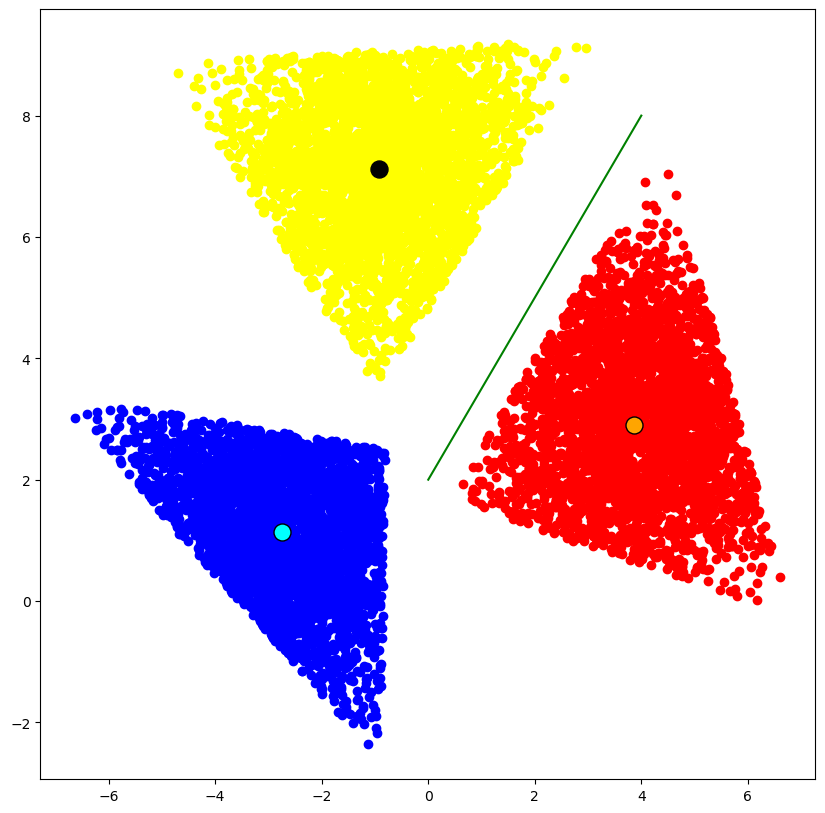

In [58]:
# 66666
file_path = '5.csv'

data = pd.read_csv(file_path, skiprows=1, delimiter = ';')

x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist()  

yy = 3.5
x1 = 0
x2 = 4
y1 = 2
y2 = 8
x3 = 0
x4 = 0
y3 = 8
y4 = -4

def classify_point_via_cross_product(px, py, x1, y1, x2, y2):
    if(py > yy):
        px = px - x1
        py = py - y1
        cross_product = (x2 - x1) * py - (y2 - y1) * px
        if cross_product > 0:
            return 3
        elif cross_product < 0:
            return 2 
    else:
        px = px - x3
        py = py - y3
        cross_product = (x4 - x3) * py - (y4 - y3) * px
        if cross_product > 0:
            return 2
        elif cross_product < 0:
            return 1 

cluster1, cluster2, cluster3 = [], [], []

for px, py in zip(x, y):
    cluster = classify_point_via_cross_product(px, py, x1, y1, x2, y2)
    if cluster == 1:
        cluster1.append((px, py))
    elif cluster == 2:
        cluster2.append((px, py))
    elif cluster == 3:
        cluster3.append((px,py))
    

def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1])**2)

def man(p1,p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def find_central_point(cluster):
    min_distance = float('inf')
    central_point = None
    for p1 in cluster:
        total_distance = sum(euclidean_distance(p1, p2) for p2 in cluster)
        if total_distance < min_distance:
            min_distance = total_distance
            central_point = p1
            
    return central_point

central_point1 = find_central_point(cluster1)
central_point2 = find_central_point(cluster2)
central_point3 = find_central_point(cluster3)

avgx = (central_point1[0] + central_point2[0] + central_point3[0]) / 3
avgy = (central_point2[1] + central_point1[1] + central_point3[1]) / 3
avgx *= 1000
avgy *= 1000
if(avgx > int(avgx)):
    print("X:", int(avgx))
else:
    print("X:", int(avgx) - 1)
if(avgy > int(avgy)):
    print("Y:", int(avgy))
else:
    print("Y:", int(avgy) - 1)

plt.figure(figsize=(10, 10))

cluster1_x, cluster1_y = zip(*cluster1)
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Кластер 1')
plt.scatter(*central_point1, color='cyan', edgecolors='black', s=150, label='Центральная точка Кластера 1')

cluster2_x, cluster2_y = zip(*cluster2)
plt.scatter(cluster2_x, cluster2_y, color='red', label='Кластер 2')
plt.scatter(*central_point2, color='orange', edgecolors='black', s=150, label='Центральная точка Кластера 2')

cluster3_x, cluster3_y = zip(*cluster3)
plt.scatter(cluster3_x, cluster3_y, color='yellow', label='Кластер 3')
plt.scatter(*central_point3, color='black', edgecolors='black', s=150, label='Центральная точка Кластера 3')
plt.plot([x1, x2], [y1, y2], color='green', linestyle='-')

plt.show()
# 66666

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =  
dbscan = 

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()